In [47]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import warnings; warnings.simplefilter('ignore')

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

df = pd.read_csv('Country-data.csv')
df.set_index('country', inplace=True)
print(df)

                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0

In [48]:
def show_selected_countries(df, cluster_number, column, second_column_name, ascending=True):
    cluster_df = df[df['Cluster'] == cluster_number]
    sorted_countries = cluster_df.sort_values(by=column, ascending=ascending)
    print(sorted_countries[['Country', column, second_column_name]].head(5))

def kmeans_clustering_and_plot(df, feature_columns):
    # Extract the selected columns from the DataFrame
    X = df[feature_columns].values

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Calculate the sum of squared distances (inertia) for different values of k
    inertia_values = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia_values.append(kmeans.inertia_)

    # Find the knee point to determine the optimal k
    kneedle = KneeLocator(range(1, 11), inertia_values, curve='convex', direction='decreasing')
    optimal_k = kneedle.elbow

    # Visualize the elbow plot
    plt.plot(range(1, 11), inertia_values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (Inertia)')

    # Highlight the optimal k
    plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Optimal k')
    plt.legend()
    plt.show()

    # Apply k-means with the optimal k
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
    y_kmeans_optimal = kmeans_optimal.fit_predict(X_scaled)

    # Plot the data points
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_optimal, cmap='viridis', s=50)

    # Plot the cluster centers
    centers_optimal = kmeans_optimal.cluster_centers_
    plt.scatter(centers_optimal[:, 0], centers_optimal[:, 1], c='red', s=200, alpha=0.75)

    # Create a legend
    legend_labels = list(range(optimal_k))
    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Clusters")

    plt.title(f'K-Means Clustering with Optimal k={optimal_k}')
    plt.xlabel(f'{feature_columns[0]} (Standardized)')
    plt.ylabel(f'{feature_columns[1]} (Standardized)')
    plt.show()

    country_cluster_df = pd.DataFrame({'Country': df.index, 'Cluster': y_kmeans_optimal})
    merged_df = pd.merge(country_cluster_df, df, left_on='Country', right_index=True)
    return merged_df

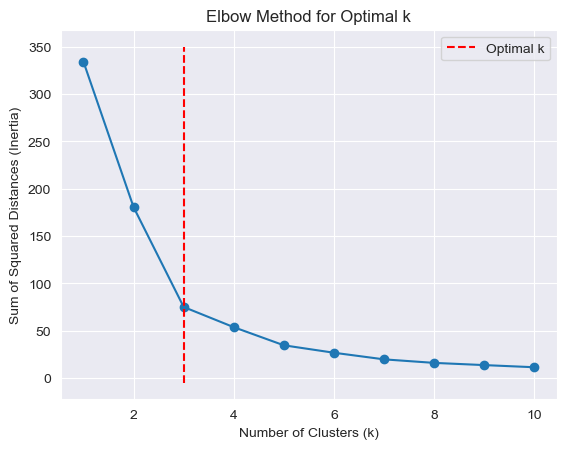

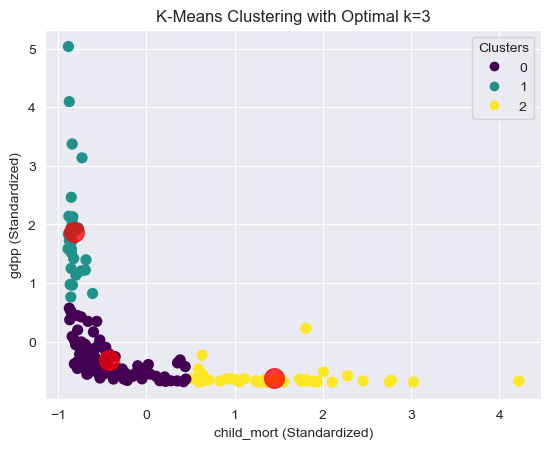

In [49]:
child_mort_gdpp_df = kmeans_clustering_and_plot(df, ['child_mort', 'gdpp'])

In [67]:
show_selected_countries(child_mort_gdpp_df, cluster_number=2, column='child_mort',second_column_name='gdpp', ascending=False)

                      Country  child_mort  gdpp
66                      Haiti       208.0   662
132              Sierra Leone       160.0   399
32                       Chad       150.0   897
31   Central African Republic       149.0   446
97                       Mali       137.0   708


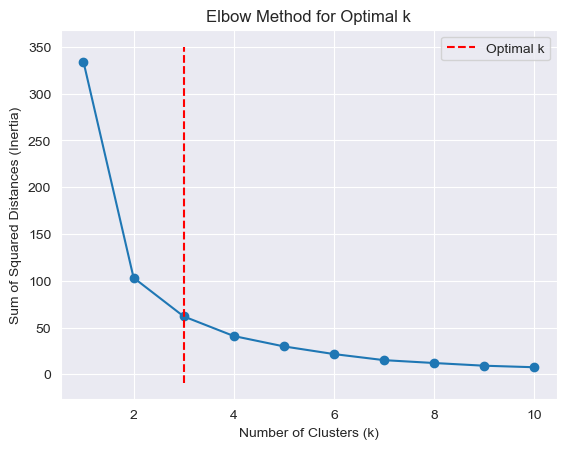

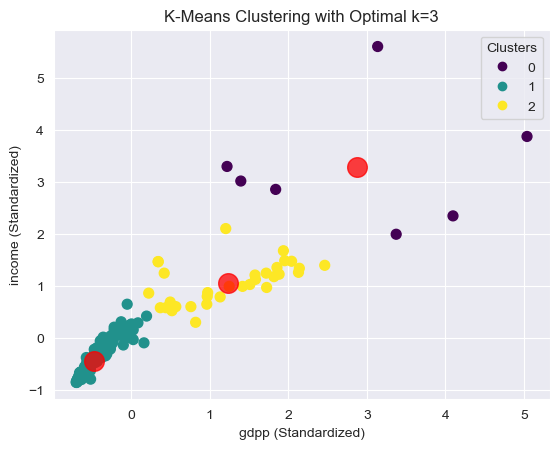

In [52]:
gdpp_income_df = kmeans_clustering_and_plot(df, ['gdpp', 'income'])

In [54]:
show_selected_countries(gdpp_income_df, cluster_number=1, column='gdpp',second_column_name='income', ascending=True)

              Country  gdpp  income
26            Burundi   231     764
88            Liberia   327     700
37   Congo, Dem. Rep.   334     609
112             Niger   348     814
132      Sierra Leone   399    1220


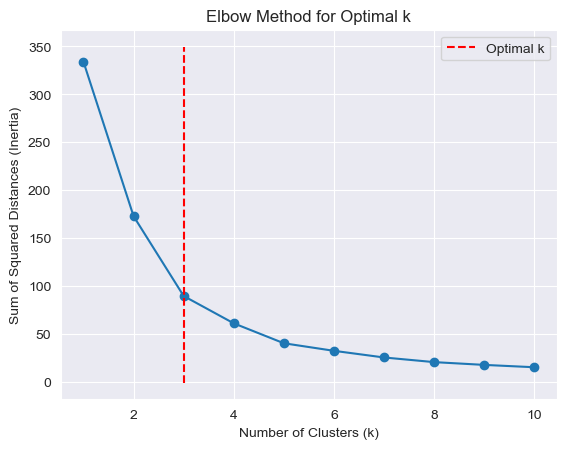

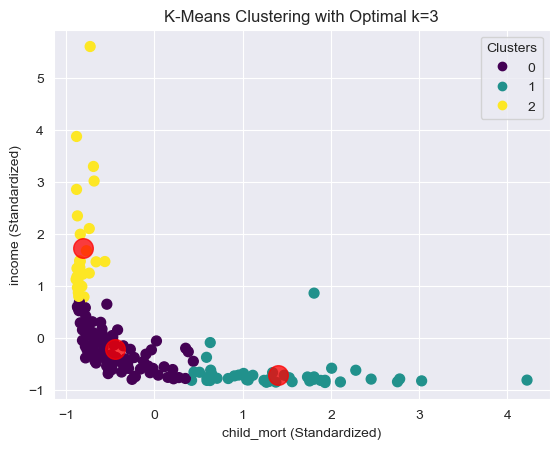

In [55]:
child_mort_income_df = kmeans_clustering_and_plot(df, ['child_mort', 'income'])


In [59]:
show_selected_countries(child_mort_income_df, cluster_number=1, column='child_mort',second_column_name='income', ascending=False)

                      Country  child_mort  income
66                      Haiti       208.0    1500
132              Sierra Leone       160.0    1220
32                       Chad       150.0    1930
31   Central African Republic       149.0     888
97                       Mali       137.0    1870


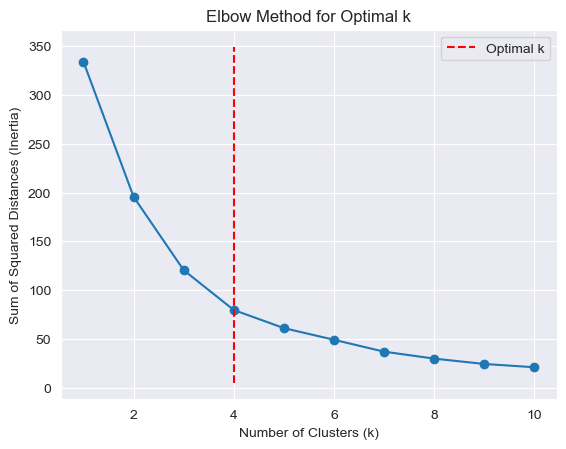

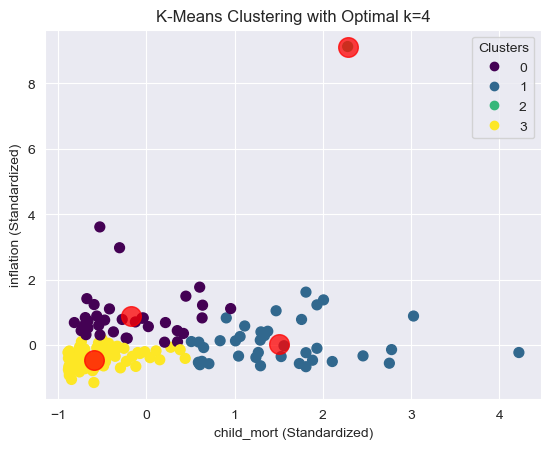

In [57]:
child_mort_inflation_df = kmeans_clustering_and_plot(df, ['child_mort', 'inflation'])


In [63]:
show_selected_countries(child_mort_inflation_df, cluster_number=2, column='inflation',second_column_name='child_mort', ascending=False)
show_selected_countries(child_mort_inflation_df, cluster_number=1, column='inflation',second_column_name='child_mort', ascending=False)


     Country  inflation  child_mort
113  Nigeria      104.0       130.0
               Country  inflation  child_mort
49   Equatorial Guinea       24.9       111.0
3               Angola       22.4       119.0
37    Congo, Dem. Rep.       20.8       116.0
99          Mauritania       18.9        97.4
132       Sierra Leone       17.2       160.0
